In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# - Missing Data
   **I checked for the existance of Nan values and other values as well that could be used to express missing data but I 
    found nothing**

In [3]:
df.info() # no null values - still checking if other missing value expressions exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
notFound=0
for ex in df['purpose']:
    if ('x'or'xx'or'unknown'or'not found' or 'missing') in ex.lower():
        notFound +=1
print(f'Category:purpose -  {notFound} missing data\n') #nope ther is nothing

Category:purpose -  0 missing data



# - Categorical Data
   **The only categorical data was for the purpose and I used one hot encoder since this data is of no sequence/ pattern**

In [5]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [6]:
x = df.groupby('purpose').size().sort_values(ascending=False)
x

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
dtype: int64

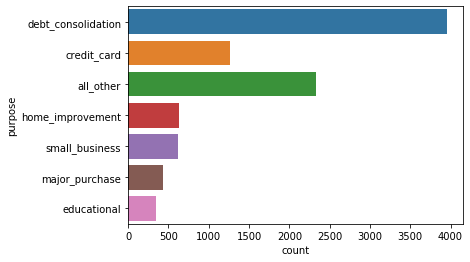

In [7]:
sns.countplot(y = df['purpose'])

In [8]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
df.head(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# - Data Cleaning:
   **This requires knowledge with the field and more information about the data but I think there is nothing unordinary 
    about the data**

In [9]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe().iloc[[3,7]]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
min,0.0,0.0600,15.67,7.547502,0.00,612.0,178.958333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,0.2164,940.14,14.528354,29.96,827.0,17639.958330,1207359.0,119.0,33.0,13.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
df.groupby('credit.policy').size().sort_values(ascending=False) #boolian

credit.policy
1    7710
0    1868
dtype: int64

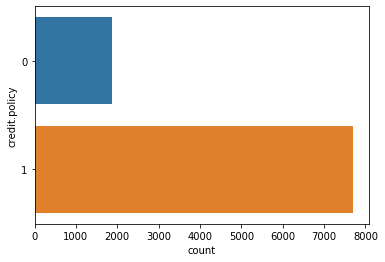

In [12]:
sns.countplot(y = df['credit.policy']) # boolian - categorical

In [13]:
df['credit.policy'] = df['credit.policy'].astype(int)

In [14]:
df['int.rate'].unique() #length: 249, dtype: int64 

array([0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.1496, 0.1114,
       0.1134, 0.1221, 0.1347, 0.1324, 0.0859, 0.0714, 0.0863, 0.1103,
       0.1317, 0.0894, 0.1039, 0.1513, 0.08  , 0.1355, 0.1229, 0.0901,
       0.0743, 0.1375, 0.0807, 0.1028, 0.087 , 0.1122, 0.0996, 0.0933,
       0.0838, 0.0775, 0.1059, 0.1596, 0.1154, 0.1343, 0.1249, 0.0964,
       0.1186, 0.1501, 0.128 , 0.1091, 0.1217, 0.1533, 0.0712, 0.1438,
       0.1565, 0.1467, 0.1312, 0.147 , 0.1407, 0.1014, 0.1046, 0.133 ,
       0.0983, 0.1393, 0.092 , 0.1236, 0.1362, 0.1078, 0.1583, 0.1109,
       0.1141, 0.1267, 0.1204, 0.0951, 0.1172, 0.1299, 0.1488, 0.152 ,
       0.1425, 0.1836, 0.1615, 0.06  , 0.0832, 0.1261, 0.0945, 0.1197,
       0.1387, 0.0976, 0.1292, 0.0737, 0.0768, 0.1166, 0.1418, 0.1545,
       0.1482, 0.1703, 0.145 , 0.1671, 0.1576, 0.1608, 0.164 , 0.1734,
       0.1051, 0.157 , 0.1222, 0.1273, 0.1379, 0.1253, 0.1128, 0.1286,
       0.1287, 0.097 , 0.1001, 0.1538, 0.1191, 0.1254, 0.1159, 0.138 ,
      

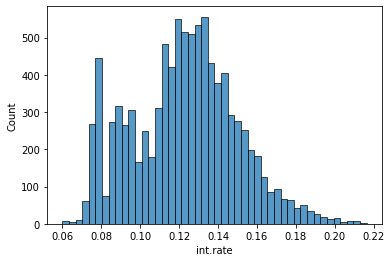

In [15]:
sns.histplot(df['int.rate'])

In [16]:
df['pub.rec'].unique() # considered categorical too

array([0, 1, 2, 3, 4, 5], dtype=int64)

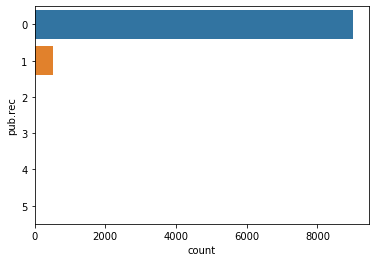

In [17]:
sns.countplot(y = df['pub.rec']) # 2,3,4,5 could be considered as rare phenomena in the data but could be considered necessary

In [18]:
x = df.groupby('pub.rec').size().sort_values(ascending=False)
perc = []
for i in x.values:
    perc.append(str(round(100*i/len(df),2))+'%')

y = pd.Series(data=perc, index=list(x.index))
new_df = pd.DataFrame(columns = ['Count', 'Percentage'])
new_df['Count'] = x
new_df['Percentage'] = y

new_df      # I think that 2,3,4,and 5 could be outliers except if these values are simply rare appearances but possible

,Count,Percentage
pub.rec,,
0,9019,94.16%
1,533,5.56%
2,19,0.2%
3,5,0.05%
5,1,0.01%
4,1,0.01%


In [19]:
# we could remove them though using data cleaning
df = df.drop(df[df['pub.rec']==5].index)
df = df.drop(df[df['pub.rec']==4].index)
df['pub.rec'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
df['delinq.2yrs'].unique()

array([ 0,  1,  2,  4,  3,  5,  6, 13,  7,  8, 11], dtype=int64)

In [21]:
y=  df.groupby('pub.rec').size().sort_values(ascending=False)
list(y.index)

[0, 1, 2, 3]

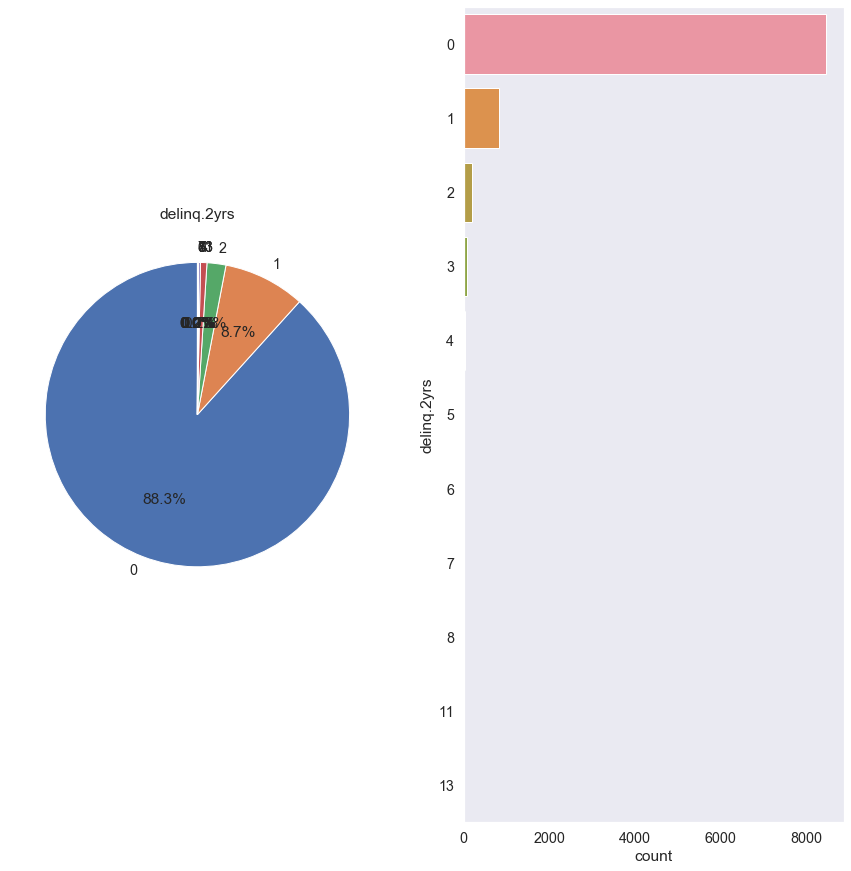

In [22]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
plt.subplot(1,2,1)
f = df.groupby('delinq.2yrs').size().sort_values(ascending=False)

sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(f.values), labels=list(f.index) , autopct='%1.1f%%',startangle=90)
plt.title('delinq.2yrs')

plt.subplot(1,2,2)
sns.countplot(y = df['delinq.2yrs']) 

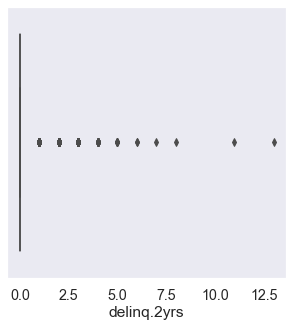

In [23]:
sns.boxplot(x=df['delinq.2yrs'])

In [24]:
x = df.groupby('delinq.2yrs').size().sort_values(ascending=False)
perc = []
for i in x.values:
    perc.append(str(round(100*i/len(df),2))+'%')

y = pd.Series(data=perc, index=list(x.index))
new_df = pd.DataFrame(columns = ['Count', 'Percentage'])
new_df['Count'] = x
new_df['Percentage'] = y

new_df # I think we could remove all those greater than 3   

,Count,Percentage
delinq.2yrs,,
0,8456,88.3%
1,832,8.69%
2,192,2.01%
3,65,0.68%
4,19,0.2%
5,6,0.06%
6,2,0.02%
13,1,0.01%
11,1,0.01%


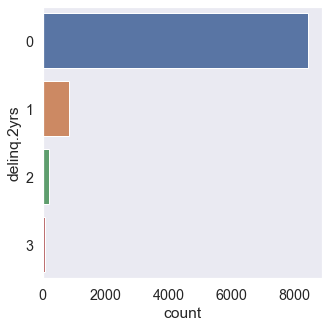

In [25]:
df = df.drop(df[df['delinq.2yrs']>3].index)
sns.countplot(y = df['delinq.2yrs']) 

# - Detect and Handle Outliers

In [26]:
df.describe().iloc[[3,7]].drop(['credit.policy','not.fully.paid','pub.rec','purpose_credit_card',
                                'purpose_debt_consolidation','purpose_educational','purpose_home_improvement'
                                ,'purpose_major_purchase','purpose_small_business'], axis=1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs
min,0.0600,15.67,7.547502,0.00,612.0,178.958333,0.0,0.0,0.0,0.0
max,0.2164,940.14,14.528354,29.96,827.0,17639.958330,1207359.0,119.0,33.0,3.0


according to values:
- days.with.cr.line / revol.bal
- installment / fico / revol.util
- log.annual.inc / inq.last.6mths / dti / int.rate / delinq.2yrs

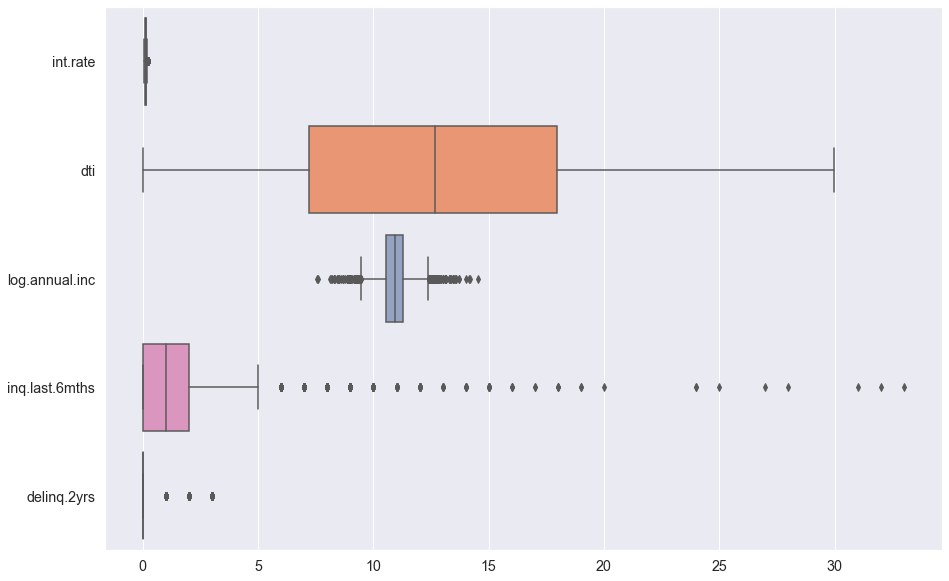

In [42]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3)
sns.boxplot(data=df[['int.rate','dti','log.annual.inc','inq.last.6mths','delinq.2yrs']], orient="h", palette="Set2")

In [28]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


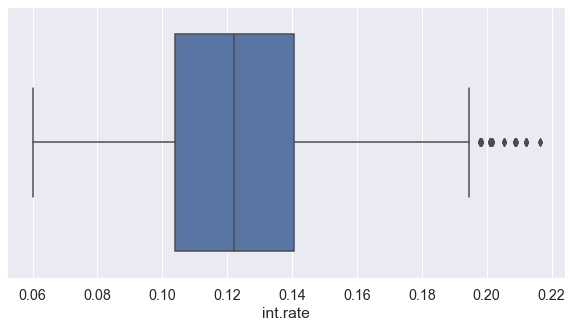

In [44]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3)
sns.boxplot(x=df['int.rate'])

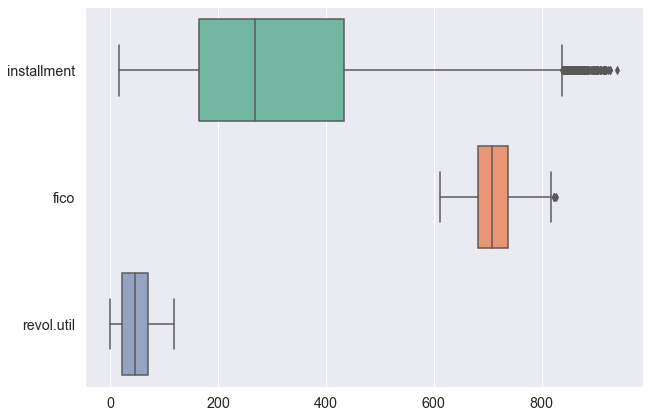

In [46]:
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.3)
sns.boxplot(data=df[['installment','fico','revol.util']], orient="h", palette="Set2")

# revol.util is the only attribute having no outliers

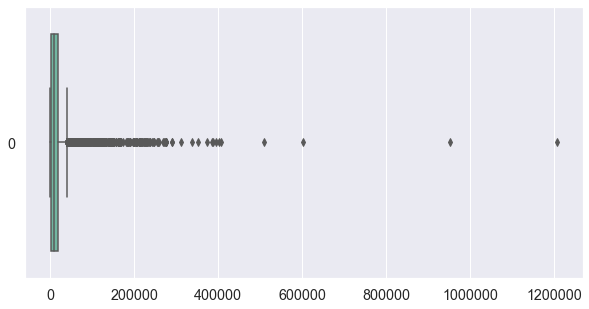

In [47]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3)
sns.boxplot(data=df['revol.bal'], orient="h", palette="Set2")

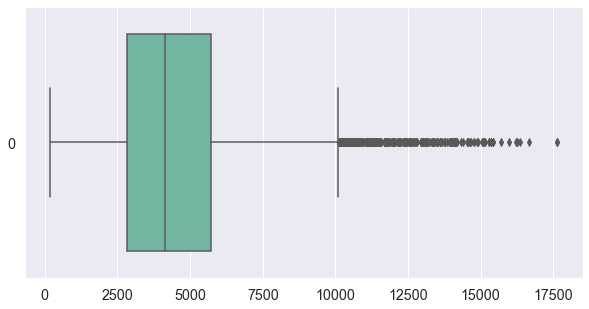

In [48]:
sns.boxplot(data=df['days.with.cr.line'], orient="h", palette="Set2")

In [53]:
attributes = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line',
              'revol.bal','revol.util','inq.last.6mths','delinq.2yrs']
for att in attributes:
    lower_limit = df[att].mean()-3*df[att].std()
    upper_limit = df[att].mean()+3*df[att].std()
    df = df[(df[att]>upper_limit)|(df[att]<lower_limit)] 
    
    # it appears that simply dropping the outliers resulted in removing all the
    #examples since outliers of an attribute differ than the other so removing outiers was not the best idea

In [54]:
df.describe().iloc[[3,7]].drop(['credit.policy','not.fully.paid','pub.rec','purpose_credit_card',
                                'purpose_debt_consolidation','purpose_educational','purpose_home_improvement'
                                ,'purpose_major_purchase','purpose_small_business'], axis=1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               0 non-null      int32  
 1   int.rate                    0 non-null      float64
 2   installment                 0 non-null      float64
 3   log.annual.inc              0 non-null      float64
 4   dti                         0 non-null      float64
 5   fico                        0 non-null      int64  
 6   days.with.cr.line           0 non-null      float64
 7   revol.bal                   0 non-null      int64  
 8   revol.util                  0 non-null      float64
 9   inq.last.6mths              0 non-null      int64  
 10  delinq.2yrs                 0 non-null      int64  
 11  pub.rec                     0 non-null      int64  
 12  not.fully.paid              0 non-null      int64  
 13  purpose_credit_card         0 non-null      uin

# - Dealing with unbalanced data

In [38]:
from sklearn.utils import resample
paid = df[df['not.fully.paid']==1]
not_paid = df[df['not.fully.paid']==0]
paid_upsampled = resample(paid, replace=True, n_samples=len(not_paid))
upsampled_df = pd.concat([not_paid, paid_upsampled])

In [35]:
df.groupby('not.fully.paid').size().sort_values(ascending=False) # boolian - categorical

not.fully.paid
0    8016
1    1529
dtype: int64

In [40]:
upsampled_df.groupby('not.fully.paid').size().sort_values(ascending=False) 

not.fully.paid
1    8016
0    8016
dtype: int64

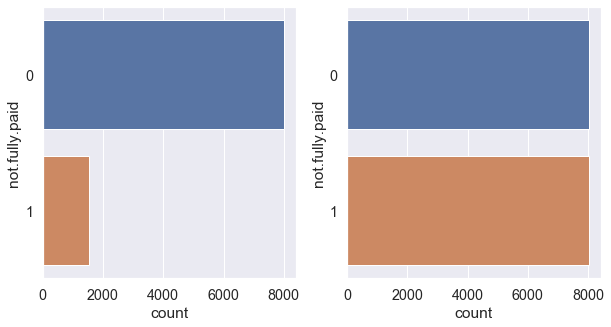

In [49]:
plt.subplot(1,2,1)
sns.countplot(y = df['not.fully.paid'])
plt.subplot(1,2,2)
sns.countplot(y = upsampled_df['not.fully.paid'])

# - Split Data to Train and Test Sets

In [51]:
from sklearn.model_selection import train_test_split
x = upsampled_df.drop('not.fully.paid',axis=1)
y = upsampled_df['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [52]:
print(f'x_train: {len(x_train)}  -   x_test: {len(x_test)}  -  y_train: {len(y_train)}  -  y_test:{len(y_test)}')

x_train: 12024  -   x_test: 4008  -  y_train: 12024  -  y_test:4008
